In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
local_path = r'/Users/pablouribepizarro/Desktop/Analisis de Datos/Tarea_1/'
datos = pd.read_csv(local_path + 'CitasEspecialidades.csv')
datos

,PAID,FechaNac,Sexo,Comuna,Provincia,Region,Agenda,TipoProfesional,Especialidad,TipoAtencion,CodPrestacion,Prestacion,FechaReserva,FechaCita,EstadoCita,MotivoC,MotivoNA,MotivoS
0,1.211693e+10,2001-06-26,Mujer,Puente Alto,Cordillera,XIII Región Metropolitana,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Nueva,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-12-30,2015-01-05,No Atendido,NaN,No se Presentó,NaN
1,1.274585e+10,2005-06-18,Hombre,Puente Alto,Cordillera,XIII Región Metropolitana,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-04-03,2015-01-05,Atendido,NaN,NaN,NaN
2,1.248321e+10,2003-10-15,Hombre,Antofagasta,Antofagasta,II Región de Antofagasta,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-05-05,2015-01-05,No Atendido,NaN,No se Presentó,NaN
3,1.153553e+10,1998-02-18,Mujer,San Bernardo,Maipo,XIII Región Metropolitana,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-07-07,2015-01-05,Atendido,NaN,NaN,NaN
4,1.135475e+10,1996-06-08,Hombre,Vilcún,Cautín,IX Región de la Araucanía,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-07-07,2015-01-05,Atendido,NaN,NaN,NaN
5,1.157893e+10,1998-12-08,Mujer,Coinco,Cachapoal,VI Región del Libertador General Bernardo O´Hi...,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-07-07,2015-01-05,Atendido,NaN,NaN,NaN
6,1.172271e+10,1999-09-02,Mujer,Molina,Curicó,VII Región del Maule,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-07-07,2015-01-05,Atendido,NaN,NaN,NaN
7,1.223425e+10,2002-11-03,Mujer,Coihueco,Ñuble,VIII Región del Bío Bío,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-07-07,2015-01-05,Atendido,NaN,NaN,NaN
8,1.147429e+10,1997-04-18,Hombre,Peñalolén,Santiago,XIII Región Metropolitana,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-07-10,2015-01-05,No Atendido,NaN,No se Presentó,NaN
9,1.200020e+10,2000-11-08,Mujer,Freire,Cautín,IX Región de la Araucanía,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-07-21,2015-01-05,Atendido,NaN,NaN,NaN


In [3]:
def Anteriores(data):
    return(data.shape[0])   

In [4]:
def Distancia(region):
    if region == 'XIII Región Metropolitana ':
        return(0) 
    elif region == 'V Región de Valparaíso ' or region == 'VI Región del Libertador General Bernardo O´Higgins':
        return(1)
    elif region == 'IV Región de Coquimbo' or region == 'VII Región del Maule':
        return(2)
    elif region == 'III Región de Atacama':
        return(3)
    elif region == 'VIII Región del Bío Bío' or region == 'II Región de Antofagasta':
        return(4)
    elif region == 'IX Región de la Araucanía' or region == 'I Región de Tarapacá':
        return(5)
    elif region == 'XIV Región de los Ríos' or region == 'XV Región de Arica y Parinacota ':
        return(6)
    elif region == 'X Región de los Lagos':
        return(7)
    elif region == 'XI Región Aysén del General Carlos Ibáñez del Campo':
        return(8)
    elif region == 'XII Región de Magallanes y la Antártica Chilena':
        return(9)
    else: 
        return(10)

In [5]:
#Transform Data into Numerical:

datos['FechaNac'] = pd.to_datetime(datos['FechaNac'])
datos['FechaReserva'] = pd.to_datetime(datos['FechaReserva'])
datos['FechaCita'] = pd.to_datetime(datos['FechaCita'])
datos = datos.sort_values('FechaCita')

In [6]:
#Feature Creation
datos['Edad'] = np.floor((datos['FechaReserva']-datos['FechaNac']).dt.days/365)
datos['DiasReservaCita'] = (datos['FechaCita']-datos['FechaReserva']).dt.days
datos['Dia Cita'] = datos['FechaCita'].dt.dayofweek

In [7]:
datos['Distancia'] = datos.apply(lambda row: Distancia(row['Region']),axis = 1)

In [8]:
datos['Reservas Anteriores'] = datos.apply(lambda row: 
                                           Anteriores(datos.loc[(datos['PAID'] == row['PAID']) 
                                            & (datos['FechaCita'] < row['FechaCita'])]), axis =1 )

In [9]:
datos_cancelaciones = datos.loc[datos['EstadoCita'] == 'Cancelado'].copy()
datos_atenciones = datos.loc[datos['EstadoCita'] == 'Atendido'].copy()
datos_noatenciones = datos.loc[datos['EstadoCita'] == 'No Atendido'].copy()

In [10]:
datos['Cancelaciones Anteriores'] = datos.apply(lambda row: 
                                           Anteriores(datos_cancelaciones.loc[(datos_cancelaciones['PAID'] == row['PAID']) 
                                            & (datos_cancelaciones['FechaCita'] < row['FechaCita'])]), axis =1 )


In [11]:
datos['Atenciones Anteriores'] = datos.apply(lambda row: 
                                           Anteriores(datos_atenciones.loc[(datos_atenciones['PAID'] == row['PAID']) 
                                            & (datos_atenciones['FechaCita'] < row['FechaCita'])]), axis =1 )

In [12]:
datos['No Atenciones Anteriores'] = datos.apply(lambda row: 
                                           Anteriores(datos_noatenciones.loc[(datos_noatenciones['PAID'] == row['PAID']) 
                                            & (datos_noatenciones['FechaCita'] < row['FechaCita'])]), axis =1 )

In [14]:
#Save Preprepared Data
datos.to_csv(local_path+'data_new_features.csv')

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


column_list = [] #str columns
for column in datos.columns:
    if datos[column].dtype == 'O':
        column_list.append(column)

datos_num = datos[column_list].astype(str).apply(le.fit_transform)
for column in datos.columns:
    if datos[column].dtype != 'O':
        datos_num[column] = datos[column]

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,criterion='entropy')
clf.fit(datos_num[['Sexo', 'Comuna', 'Provincia', 'Region', 'Agenda', 'TipoProfesional',
       'Especialidad', 'TipoAtencion', 'Prestacion']], datos_num['EstadoCita'])

clf.score(datos_num[['Sexo', 'Comuna', 'Provincia', 'Region', 'Agenda', 'TipoProfesional',
       'Especialidad', 'TipoAtencion', 'Prestacion']], datos_num['EstadoCita'])

0.64280361846933498

In [45]:
clf.feature_importances_

array([ 0.08340837,  0.34685447,  0.0963703 ,  0.06879648,  0.15898036,
        0.10619431,  0.00993819,  0.10269521,  0.02676231])

In [46]:
clf.fit(datos_num[['Sexo', 'Comuna', 'Provincia', 'Region', 'Agenda',
                   'TipoProfesional','Especialidad', 'TipoAtencion', 'Prestacion','Edad',
                   'DiasReservaCita','Reservas Anteriores','Cancelaciones Anteriores','Atenciones Anteriores','No Atenciones Anteriores',
                   'Distancia', 'Dia Cita']], datos_num['EstadoCita'])

clf.score(datos_num[['Sexo', 'Comuna', 'Provincia', 'Region', 'Agenda', 
                     'TipoProfesional','Especialidad', 'TipoAtencion', 'Prestacion','Edad',
                     'DiasReservaCita','Reservas Anteriores','Cancelaciones Anteriores','Atenciones Anteriores','No Atenciones Anteriores',
                    'Distancia','Dia Cita']], datos_num['EstadoCita'])


0.96845040827520146

In [47]:
clf.feature_importances_

array([ 0.04523571,  0.14701737,  0.02551077,  0.0160875 ,  0.03272706,
        0.01401996,  0.00490948,  0.01928926,  0.0047086 ,  0.18515224,
        0.22660469,  0.0679295 ,  0.04310278,  0.05450307,  0.02882902,
        0.01571203,  0.06866095])

In [27]:
datos.groupby(['EstadoCita']).count()

,PAID,FechaNac,Sexo,Comuna,Provincia,Region,Agenda,TipoProfesional,Especialidad,TipoAtencion,...,MotivoNA,MotivoS,Edad,DiasReservaCita,Dia Cita,Distancia,Reservas Anteriores,Cancelaciones Anteriores,Atenciones Anteriores,No Atenciones Anteriores
EstadoCita,,,,,,,,,,,,,,,,,,,,,
Agendado,196,196,196,192,181,181,196,196,196,196,...,0,44,196,196,196,196,196,196,196,196
Atendido,82196,82196,82196,80832,72545,72406,82196,82196,82196,82193,...,0,11570,82196,82196,82196,82196,82196,82196,82196,82196
Cancelado,24297,24297,24297,23835,21212,21175,24297,24297,24297,24102,...,0,1890,24297,24297,24297,24297,24297,24297,24297,24297
En Espera,7,7,7,7,7,7,7,7,7,7,...,0,0,7,7,7,7,7,7,7,7
No Atendido,22732,22732,22732,22314,19953,19899,22732,22732,22732,22729,...,22732,1709,22732,22732,22732,22732,22732,22732,22732,22732
Tranferido,19,19,19,19,14,14,19,19,19,19,...,0,0,19,19,19,19,19,19,19,19


In [71]:
len(datos['PAID'].unique())

31322

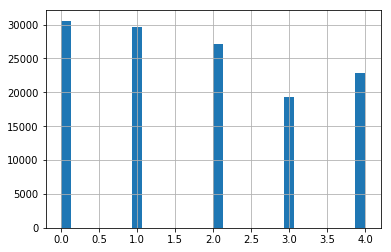

In [50]:
datos['Dia Cita'].hist(bins=30)

In [58]:
datos[datos['Provincia'].isnull()]

,PAID,FechaNac,Sexo,Comuna,Provincia,Region,Agenda,TipoProfesional,Especialidad,TipoAtencion,...,MotivoNA,MotivoS,Edad,DiasReservaCita,Dia Cita,Distancia,Reservas Anteriores,Cancelaciones Anteriores,Atenciones Anteriores,No Atenciones Anteriores
28823,1.398808e+10,2012-06-28,Hombre,Curicó,NaN,NaN,Policlínico de Oftalmología,Médico Cirujano,Oftalmología,Consulta Repetida,...,NaN,NaN,2.0,7,4,10,0,0,0,0
40491,1.327829e+10,2008-07-23,Hombre,Diego de Almagro,NaN,NaN,Policlínico de Oftalmología,Médico,Oftalmología,Consulta Repetida,...,NaN,NaN,6.0,14,4,10,0,0,0,0
28828,1.407160e+10,2012-04-12,Mujer,Quilpué,NaN,NaN,Policlínico de Oftalmología,Médico Cirujano,Oftalmología,Consulta Repetida,...,NaN,NaN,2.0,17,4,10,0,0,0,0
28829,1.394128e+10,2012-03-30,Mujer,Puente Alto,NaN,NaN,Policlínico de Oftalmología,Médico Cirujano,Oftalmología,Consulta Repetida,...,NaN,NaN,2.0,17,4,10,0,0,0,0
28848,1.441695e+10,2014-08-28,Mujer,Pedro Aguirre Cerda,NaN,NaN,Policlínico de Oftalmología,Médico Cirujano,Oftalmología,Consulta Repetida,...,NaN,Aprobado por el Profesional,0.0,7,0,10,0,0,0,0
28840,1.434220e+10,2014-04-22,Mujer,San Fernando,NaN,NaN,Policlínico de Oftalmología,Médico Cirujano,Oftalmología,Consulta Repetida,...,NaN,Aprobado por el Profesional,0.0,7,0,10,0,0,0,0
72219,1.224933e+10,2002-12-05,Hombre,Las Condes,NaN,NaN,Policlínico de Traumatología,Médico Cirujano,Traumatología Infantil,Consulta Repetida,...,NaN,NaN,12.0,-3,0,10,0,0,0,0
125673,1.390892e+10,2003-07-29,Mujer,La Reina,NaN,NaN,Policlínico de Yeso,Médico Cirujano,Traumatología Infantil,Consulta Nueva,...,NaN,NaN,11.0,0,1,10,0,0,0,0
23362,1.447924e+10,2014-12-20,Hombre,La Florida,NaN,NaN,Policlínico de Oftalmología,Médico Cirujano,Oftalmología,Consulta Repetida,...,NaN,NaN,0.0,0,1,10,0,0,0,0
45021,1.191360e+10,2000-02-08,Mujer,Independencia,NaN,XIII Región Metropolitana,Policlínico de Traumatología,Médico Cirujano,Traumatología Infantil,Consulta Repetida,...,NaN,NaN,14.0,36,2,0,0,0,0,0


In [60]:
datos['Provincia'].isnull() & datos['Region'].isnull()

23345     False
28823      True
28822     False
28821     False
28820     False
28819     False
40484     False
40485     False
40486     False
40487     False
40488     False
40489     False
40490     False
40491      True
28824     False
40492     False
61526     False
61525     False
23344     False
23346     False
23343     False
23342     False
23341     False
28814     False
28815     False
28816     False
28817     False
28818     False
23338     False
61527     False
          ...  
87562     False
87560     False
40473     False
40472     False
40471     False
40470     False
40469     False
40468     False
40467     False
40466     False
40465     False
40464     False
125666    False
125665    False
87561     False
125664    False
125662    False
125661    False
125660    False
125659    False
8691      False
112148    False
112147    False
112146    False
112145    False
112144    False
112143    False
87559     False
125663    False
8692      False
Length: 129447, dtype: b

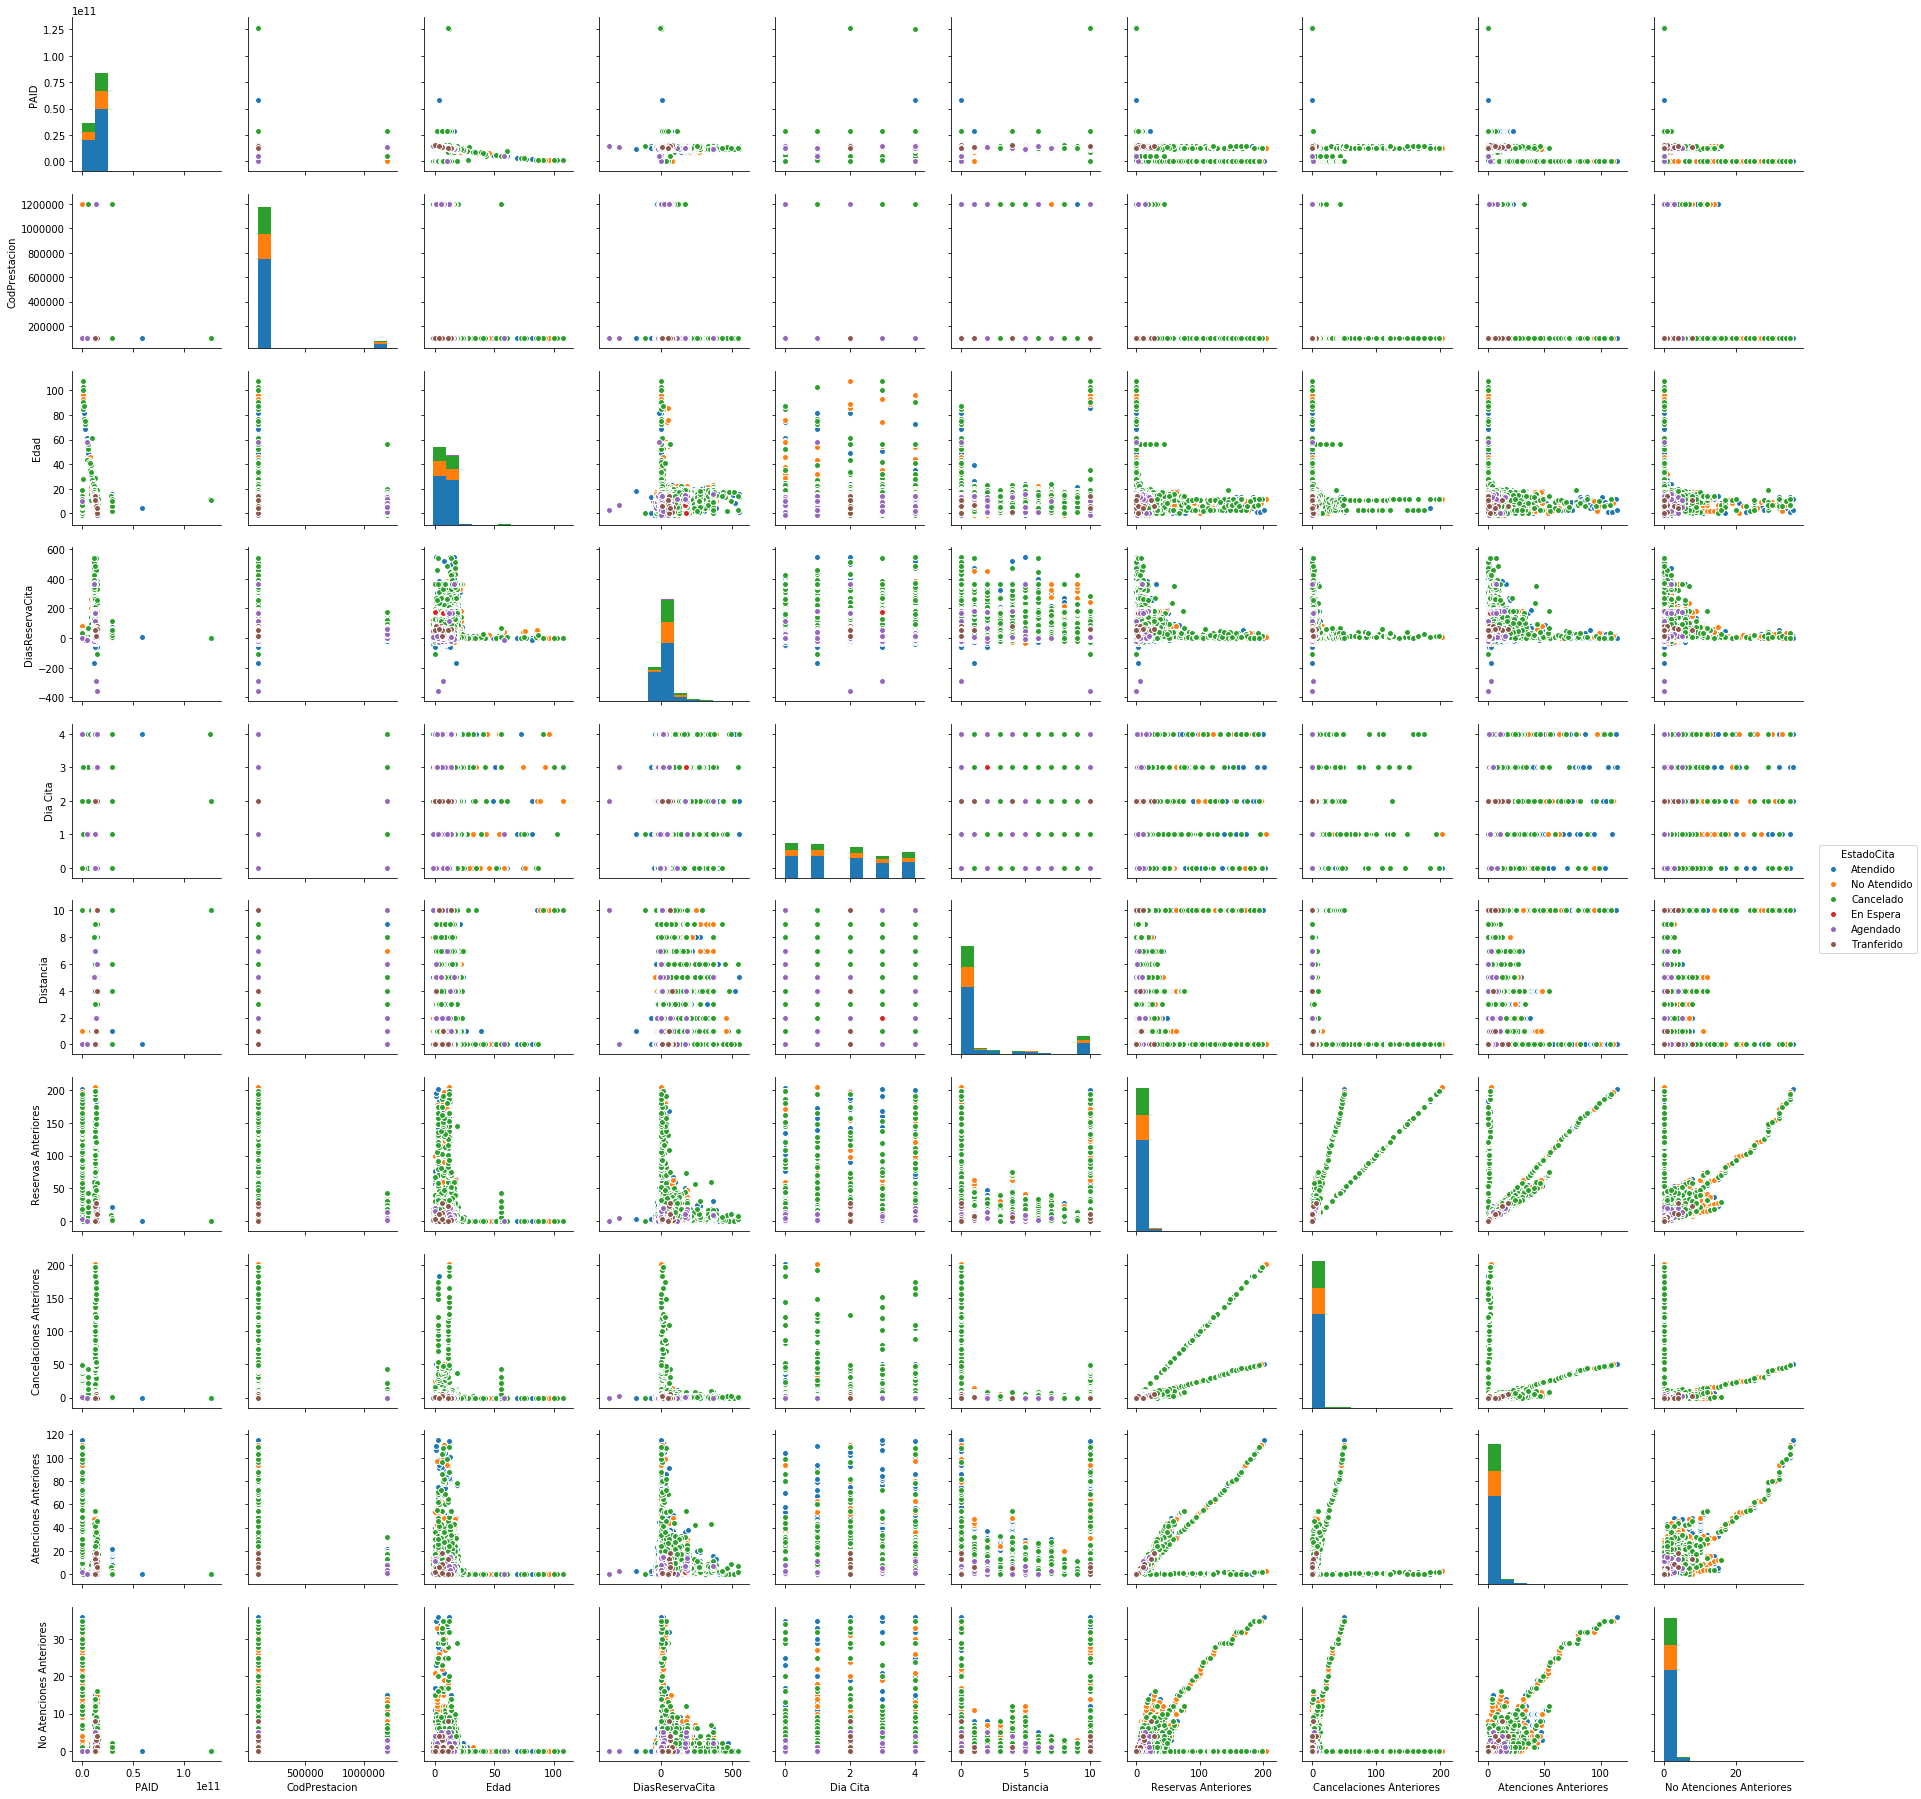

In [61]:
sns.pairplot(datos, hue="EstadoCita")